## K - Nearest Neighbour

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
data_fr = pd.read_csv('data.csv')
test_fr = pd.read_csv('test.csv')

In [3]:
print(data_fr)

      a1    a2  red  green  blue  output
0   16.7  65.9    0    128     0     1.0
1   23.8  64.4  255     20   147     0.0
2   40.3  24.1  255    215     0     0.0
3   37.6  47.2  255    140     0     0.0
4    9.7  43.8  255    215     0     0.0
..   ...   ...  ...    ...   ...     ...
56  49.6  37.2  255     20   147     0.0
57  38.1  11.3  255    215     0     0.0
58   7.5  13.6  139      0   139     1.0
59  59.4   9.6    0    128     0     1.0
60  47.3  15.8  255    250     1     NaN

[61 rows x 6 columns]


In [4]:
print(test_fr)

     a1    a2  red  green  blue
0   9.7  66.5    0      0   255
1  50.7  24.1  255    215   255
2  32.4  54.4    0    128     0
3  38.1  46.6  255      0   255
4  26.5  57.1    0    128     0


In [5]:
K = 7

In [6]:
def calculate_euclidean_distance(test_point, data_point):
    dis = 0.0
    for i in range(0, len(test_point)):
        dis = dis + pow(test_point[i] - data_point[i], 2)
    dis = pow(dis, 0.5)
    return [dis, data_point[5]]

In [ ]:
# test_point = [4.5 , 3.8 , 255 , 0 ,0]

In [7]:
def KNN(test_point):
    neighbours_info = []
    
    for index, row in data_fr.iterrows():
        data_point = np.asarray(row)
        neighbours_info.append(calculate_euclidean_distance(test_point, data_point))

    neighbours_info_sorted = sorted(neighbours_info, key=lambda x: x[0])

    ny = 0
    for i in range(0, K):
        if neighbours_info_sorted[i][1] == 1.0:
            ny += 1
    
    if ny >= K/2:
        return 1.0  # Output is Yes
    else:
        return 0.0  # Output is No

In [8]:
test_fr['output'] = test_fr.apply(lambda row: KNN(np.asarray(row)), axis=1)
print(test_fr)

     a1    a2  red  green  blue  output
0   9.7  66.5    0      0   255     0.0
1  50.7  24.1  255    215   255     1.0
2  32.4  54.4    0    128     0     1.0
3  38.1  46.6  255      0   255     0.0
4  26.5  57.1    0    128     0     1.0


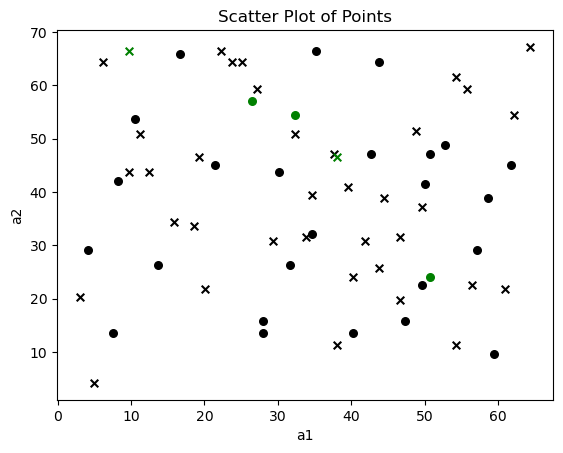

In [19]:
# Plotting the data points
for index, row in data_fr.iterrows():
    marker = 'x' if row['output'] == 0 else 'o'
    plt.scatter(row['a1'], row['a2'], c='black', marker=marker, s=30)

# Plotting the test points
for index, row in test_fr.iterrows():
    marker = 'x' if row['output'] == 0 else 'o'
    plt.scatter(row['a1'], row['a2'], c='green', marker=marker, s=30)

plt.xlabel('a1')
plt.ylabel('a2')
plt.title('Scatter Plot of Points')
plt.show()